# Hierarchical custering

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance_matrix
import pandas as pd

x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [15, 14, 19, 12, 11, 20, 15, 17, 16, 16]
store = ['A','B','C','D','E','F','G','H','I','J']

df = pd.DataFrame()
df['Store'] = store
df['Apples'] = x
df['Oranges'] = y
data = df[['Apples','Oranges']]
data

,Apples,Oranges
0,4,15
1,5,14
2,10,19
3,4,12
4,3,11
5,11,20
6,14,15
7,6,17
8,10,16
9,12,16


## Single type distance

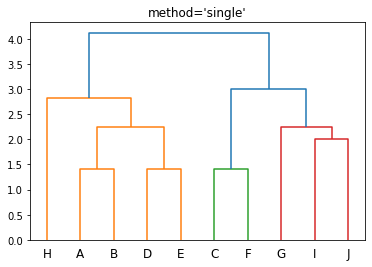

In [20]:
linkage_data = linkage(data, method = 'single', metric = 'euclidean')
dendrogram(linkage_data, labels =  df['Store'].to_list())

plt.title("method='single'")
plt.show()

## Complete type distance

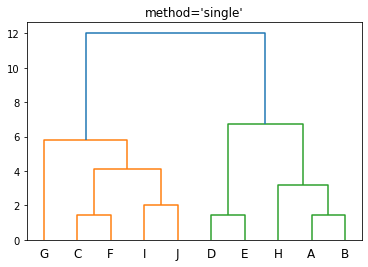

In [6]:
linkage_data = linkage(data, method = 'complete', metric = 'euclidean')
dendrogram(linkage_data, labels =  df['Store'].to_list())

plt.title("method='complete'")
plt.show()

## Average linkage type distance

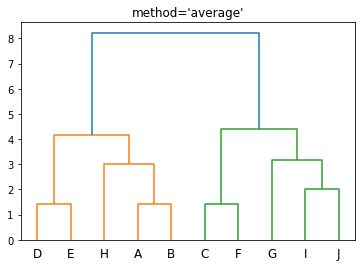

In [11]:
linkage_data = linkage(data, method = 'average', metric = 'euclidean')
dendrogram(linkage_data, labels =  df['Store'].to_list())

plt.title("method='average'")
plt.show()

## F Clustering

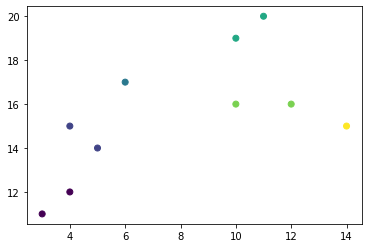

In [16]:
cluster_id = fcluster(linkage_data, t=2.5, criterion='distance')
plt.scatter(df['Apples'],df['Oranges'], c=cluster_id)
plt.show()

# K mean

In [39]:
from sklearn import cluster

k_mean_model = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_mean_model.fit(data)

print(k_mean_model)

df['cluster_id'] = k_mean_model.labels_

centroids = k_mean_model.cluster_centers_
print(centroids)

KMeans(max_iter=50, n_clusters=3, random_state=1)
[[11.4        17.2       ]
 [ 3.5        11.5       ]
 [ 5.         15.33333333]]


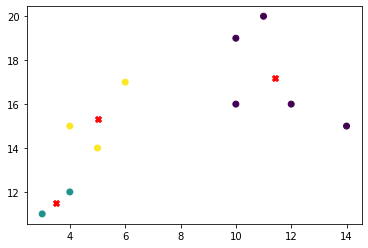

In [40]:
plt.scatter(df['Apples'],df['Oranges'], c=df['cluster_id'])
plt.scatter(centroids[:,0],centroids[:,1],marker='X', c='r')
plt.show()